In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [3]:
learning_rate = 0.01
training_epoch = 20
batch_size = 20
n_hidden = 256 # num of neurons in hidden layer
n_input = 28*28 # input size 784

In [4]:
X = tf.placeholder(tf.float32, [None, n_input]) # not using labels

In [12]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
# input -> encode -> decode -> output 

# use sigmoid func. sigmoid(X*w +b)
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [24]:
# typically the output size of encoder is smllaer than the input.
# the output size must be the same as the input image size
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder,W_decode), b_decode))

In [26]:
cost = tf.reduce_mean(tf.pow(X-decoder, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [27]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [29]:
total_batch = int(mnist.train.num_examples/batch_size)
for epoch in range(training_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict = {X:batch_xs})
        total_cost += cost_val
        
    print('Epoch', '%04d' % (epoch +1), 'Avg.cost = ', '{:.4f}'.format(total_cost/total_batch))

Epoch 0001 Avg.cost =  0.0322
Epoch 0002 Avg.cost =  0.0302
Epoch 0003 Avg.cost =  0.0283
Epoch 0004 Avg.cost =  0.0271
Epoch 0005 Avg.cost =  0.0266
Epoch 0006 Avg.cost =  0.0262
Epoch 0007 Avg.cost =  0.0260
Epoch 0008 Avg.cost =  0.0258
Epoch 0009 Avg.cost =  0.0255
Epoch 0010 Avg.cost =  0.0253
Epoch 0011 Avg.cost =  0.0251
Epoch 0012 Avg.cost =  0.0250
Epoch 0013 Avg.cost =  0.0248
Epoch 0014 Avg.cost =  0.0246
Epoch 0015 Avg.cost =  0.0245
Epoch 0016 Avg.cost =  0.0244
Epoch 0017 Avg.cost =  0.0244
Epoch 0018 Avg.cost =  0.0243
Epoch 0019 Avg.cost =  0.0242
Epoch 0020 Avg.cost =  0.0242


In [42]:
# Testing
# Encode and decode images from test set and visualize their reconstruction
n = 5
canvas_orig = np.empty((28*n, 28*n))
canvas_recon = np.empty((28*n, 28*n))
for i in range(n):
    #Mnist test set
    #batch_x, _ = mnist.test.next_batch(n) # 4*784
    batch_x, batch_y = mnist.test.next_batch(n) # 4*784
    batch_y = np.argmax(batch_y, axis = 1)
    print(batch_y)
    #Encode and decode the digit image
    g = sess.run(decoder, feed_dict = {X: batch_x})
    
    
    #Display original imgages
    for j in range(n):
        #Draw the generated digits
        canvas_orig[i * 28:(i+1) * 28, j * 28:(j+1) * 28] = batch_x[j].reshape([28,28])
    #Display reconstructed images
    for j in range(n):
        #Draw the generated digits
        canvas_recon[i * 28:(i+1) * 28, j * 28:(j+1) * 28] = g[j].reshape([28,28])

[2 7 5 4 5]
[9 0 9 5 9]
[8 9 4 4 7]
[9 6 9 2 4]
[2 6 3 2 3]


Origianl Images


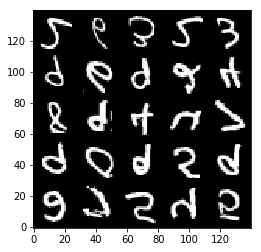

Reconstructed Images


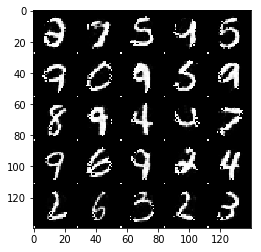

In [44]:
print("Origianl Images")
#plt.imshow(canvas_orig, origin="upper", cmap = "gray")
plt.imshow(canvas_orig, origin="lower", cmap = "gray")
plt.show()

print("Reconstructed Images")
plt.imshow(canvas_recon, origin = "upper", cmap = "gray")
plt.show()